### API Project Details

In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.
Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.
Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.
Your report will be evaluated manually and score will be awarded accordingly.

### Dataset Collection -
Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -
https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 

https://drive.google.com/file/d/1FSa_x3COvCoMODa44qXufO9CQb3ydqKw/view?usp=sharing 

Country Codes :
Country Code   Country
1              India

14             Australia

30             Brazil

37             Canada

94             Indonesia

148            New Zealand

162            Phillipines

166            Qatar

184            Singapore

189            South Africa

191            Sri Lanka

208            Turkey

214            UAE

215            United Kingdom

216            United States

### 1. The dataset is highly skewed toward the cities included in Delhi-NCR.
So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.

Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.


In [53]:
import pandas as pd
import csv

df1 = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df1.copy() # copy of main dataset df1
df.head(50)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


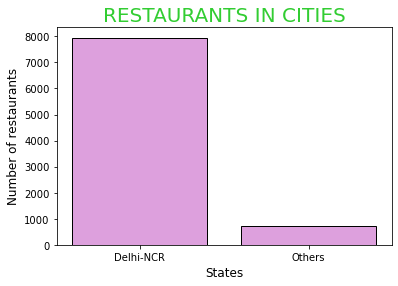

Delhi-NCR = 7947
Others = 705


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
lst = ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
for i in lst:
    df.loc[df['City'] == i, 'City'] = 'Delhi-NCR'

df = df[df['Currency'] == 'Indian Rupees(Rs.)']
cities = []
for i in df['City']:
    cities.append(i)

np_city = np.array(cities)
delhi_count = 0
others_count = 0
for i in np_city:
    if i == 'Delhi-NCR':
        delhi_count += 1
    else:
        others_count += 1

plt.bar(['Delhi-NCR','Others'], [delhi_count,others_count], color = 'plum', edgecolor = 'black')
plt.xlabel('States', fontsize = 12)
plt.ylabel('Number of restaurants', fontsize = 12)
plt.title('RESTAURANTS IN CITIES', fontsize = 20, color = 'limegreen')
plt.show()

print('Delhi-NCR =',delhi_count)
print('Others =',others_count)

### 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India. Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [30]:
a = df[df['Country Code'] == 1]
b = a[a['City'] != 'Delhi-NCR']
c = b['Cuisines']
set1 = set()
for i in c:
    mt = i.split(',')
    for i in mt:
        set1.add(i)
    
d = a[a['City'] == 'Delhi-NCR']
e = d['Cuisines']
set2 = set()
for i in e:
    st = i.split(',')
    for i in st:
        set2.add(i)

ans = set1 - set2
cuisines = []
for i in ans:
    cuisines.append(i)

print(cuisines)

['Indian', 'Tex-Mex', 'Malwani', 'Charcoal Grill', 'Andhra', ' German', ' Steak', ' BBQ', ' Cajun']


### 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


In [31]:
# For Cuisines offered in Other cities
df = df[df['Country Code'] == 1]
b = df[df['City'] != 'Delhi-NCR']
other_cities = b['Cuisines'].value_counts()[0:10]
print('Top 10 Cuisines offered in other cities of India:')
print()
print(other_cities)

Top 10 Cuisines offered in other cities of India:

North Indian, Chinese                 36
North Indian                          32
Cafe                                  25
North Indian, Mughlai                 19
Fast Food                             17
Chinese                               15
North Indian, Chinese, Continental    12
Cafe, Fast Food                        9
North Indian, Continental              7
Italian                                7
Name: Cuisines, dtype: int64


In [32]:
# For Cuisines offered in Delhi-NCR
c = df[df['City'] == 'Delhi-NCR']
delhi = c['Cuisines'].value_counts()[0:10]
print('Top 10 Cuisines offered in Delhi-NCR:')
print()
print(delhi)

Top 10 Cuisines offered in Delhi-NCR:

North Indian                      904
North Indian, Chinese             475
Fast Food                         331
Chinese                           325
North Indian, Mughlai             315
Cafe                              254
Bakery                            213
North Indian, Mughlai, Chinese    194
Bakery, Desserts                  168
Street Food                       145
Name: Cuisines, dtype: int64


### 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

#### Other_Cities

In [33]:
cuisines = []

for i in other_cities.index:
    cuisines.append(i)
print(cuisines)

['North Indian, Chinese', 'North Indian', 'Cafe', 'North Indian, Mughlai', 'Fast Food', 'Chinese', 'North Indian, Chinese, Continental', 'Cafe, Fast Food', 'North Indian, Continental', 'Italian']


In [34]:
count = []

for i in other_cities.values:
    count.append(i)
print(count)

[36, 32, 25, 19, 17, 15, 12, 9, 7, 7]


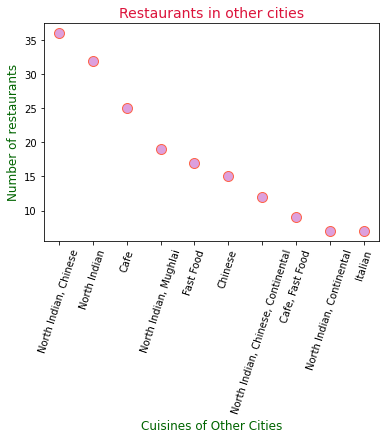

In [35]:
import matplotlib.pyplot as plt
plt.scatter(cuisines,count, edgecolor = 'tomato', marker = 'o', color = 'plum', s = 100)
plt.xticks(rotation = 72)
plt.xlabel('Cuisines of Other Cities', color = 'darkgreen', fontsize = 12)
plt.ylabel('Number of restaurants', color = 'darkgreen', fontsize = 12)
plt.title('Restaurants in other cities', color = 'Crimson', fontsize = 14)
plt.show()

#### Delhi

In [36]:
delhi_cuisines = []

for i in delhi.index:
    delhi_cuisines.append(i)
print(delhi_cuisines)

['North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese', 'North Indian, Mughlai', 'Cafe', 'Bakery', 'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food']


In [37]:
delhi_count = []

for i in delhi.values:
    delhi_count.append(i)
print(delhi_count)

[904, 475, 331, 325, 315, 254, 213, 194, 168, 145]


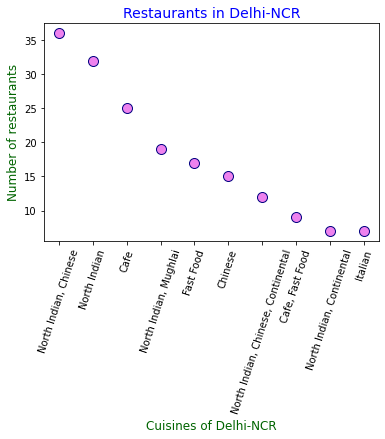

In [38]:
import matplotlib.pyplot as plt
plt.scatter(cuisines,count, edgecolor = 'navy', marker = 'o', color = 'violet', s = 100)
plt.xticks(rotation = 72)
plt.xlabel('Cuisines of Delhi-NCR', color = 'darkgreen', fontsize = 12)
plt.ylabel('Number of restaurants', color = 'darkgreen', fontsize = 12)
plt.title('Restaurants in Delhi-NCR', color = 'blue', fontsize = 14)
plt.show()

### 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

#### 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

##### 2.1.1 Number of Votes given Restaurant


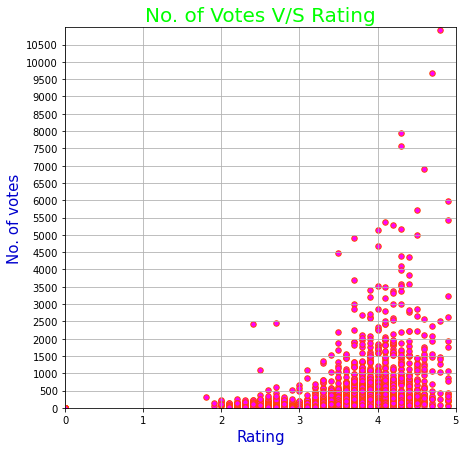

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = (7,7))
plt.scatter(df['Aggregate rating'], df['Votes'], s = 30, color = 'magenta', edgecolor = 'orangered')
plt.axis([0,5,0,11000])
plt.yticks(np.arange(0,11000,500))
plt.xlabel('Rating', fontsize = 15, color = 'mediumblue')
plt.ylabel('No. of votes', fontsize = 15, color = 'mediumblue')
plt.title('No. of Votes V/S Rating', fontsize = 20, color = 'lime')
plt.grid()
plt.show()

#### The graph depicts that no. of votes is directly proportional to the rating. So it represents that a restaurant having higher no. of votes has a rating between 4 and 5.  

##### 2.1.2 Restaurant serving more number of cuisines.

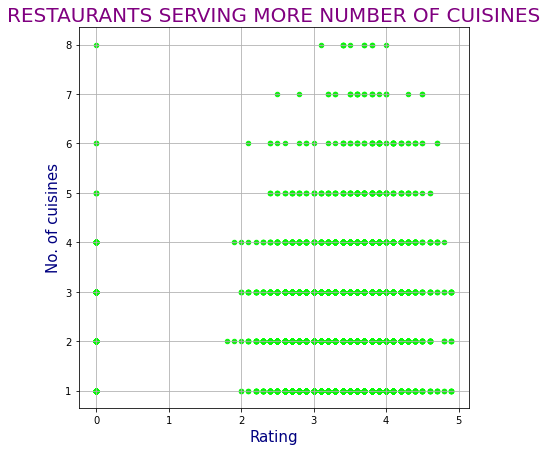

No. of cuisines served = 2 Restaurants serving more number of cuisines = 3144
No. of cuisines served = 1 Restaurants serving more number of cuisines = 3097
No. of cuisines served = 3 Restaurants serving more number of cuisines = 1596
No. of cuisines served = 4 Restaurants serving more number of cuisines = 552
No. of cuisines served = 5 Restaurants serving more number of cuisines = 155
No. of cuisines served = 6 Restaurants serving more number of cuisines = 70
No. of cuisines served = 7 Restaurants serving more number of cuisines = 26
No. of cuisines served = 8 Restaurants serving more number of cuisines = 12


In [40]:
df = df[df['Cuisines'].notnull()]
cuisines = [len(i.split(',')) for i in df['Cuisines']]
rating = [i for i in df['Aggregate rating']]

# GRAPHICAL REPRESENTATION
plt.figure(figsize = (7,7))
plt.scatter(rating, cuisines, s = 20, color = 'limegreen', alpha = 1, edgecolor = 'lime')
plt.xlabel('Rating', fontsize = 15, color = 'navy')
plt.ylabel('No. of cuisines', fontsize = 15, color = 'navy')
plt.title('RESTAURANTS SERVING MORE NUMBER OF CUISINES', fontsize = 20, color = 'purple')
plt.grid()
plt.show()

# RESTAURANTS SERVING MORE NUMBER OF CUISINES
d = dict()
for i in cuisines:
    d[i] = d.get(i,0) + 1

for i in d.keys():
    print('No. of cuisines served =', i, 'Restaurants serving more number of cuisines =', d[i])

##### <b>Clearly from the above graph, we can see that restaurents serving more no. of cuisines are not likely to have high or good ratings whether the restaurents having mainly 1 and types of cuisines are more likely to have higher ratings. As we saw in the graph the restaurents serving more than 6 cuisines are not having good rating</b>

##### 2.1.3 Average Cost of Restaurant


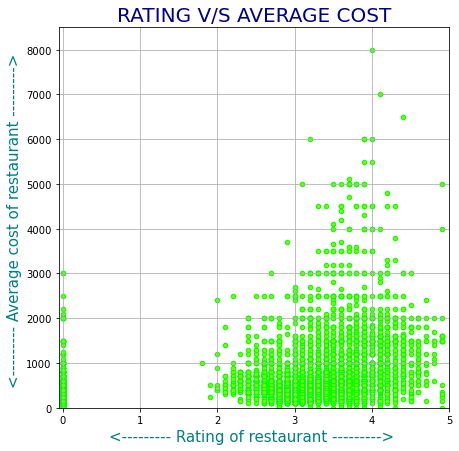

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

rating = [i for i in df['Aggregate rating']]
plt.figure(figsize = (7,7))
plt.scatter(rating, df['Average Cost for two'], s = 20, color = 'lawngreen', alpha = 1, edgecolor = 'lime')
plt.axis([-0.05,5,0,8500])
plt.grid()
plt.xlabel('<--------- Rating of restaurant ---------> ', fontsize = 15, color = 'teal')
plt.ylabel('<--------- Average cost of restaurant ---------> ', fontsize = 15, color = 'teal')
plt.title('RATING V/S AVERAGE COST', fontsize = 20, color = 'darkblue')
plt.show()

#### As we see clearly in the graph that when the average cost is upto 2000 then mostly rating is between 3 to 5 which is good and with increase in the average cost the rating is mostly between 4 to 5 but when the average cost is between 1500 to 2500 then there is slighty decrease in rating of the restaurents.

##### 2.1.4 Restaurant serving some specific cuisines

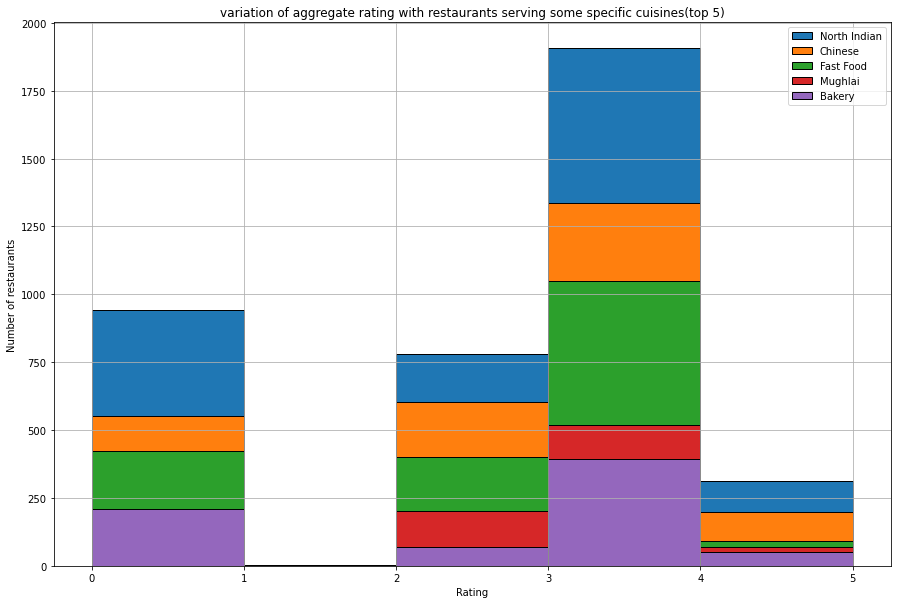

In [42]:
df = df[df['Cuisines'].notnull()]
cuisines = []
for i in df['Cuisines']:
    for j in i.split(','):
        cuisines.append(j.strip())

new = pd.DataFrame(list(cuisines), columns = ['cuisines'])
val = new['cuisines'].value_counts()[0:5]
popular_cuisines = val.index 
cuisines_freq = val.values
plt.figure(figsize = (15,10))

for i in popular_cuisines:
    rating = []
    for j,k in zip(df['Cuisines'], df['Aggregate rating']):
        if i in j:
            rating.append(k)
            
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating')
    plt.ylabel('Number of restaurants')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
    
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()
    


From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

#### 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

##### 2.2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [3]:
import pandas as pd
import csv
import numpy as np

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')

np_locality = np.array([i for i in df['Locality']])
np_rating = np.array([i for i in df['Aggregate rating']])
np_votes = np.array([i for i in df['Votes']])

dic = dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality == i)])[0] != 0:
        dic[i] = sum((np_votes * np_rating)[np.argwhere(np_locality == i)])[0] / sum(np_votes[np.argwhere(np_locality == i)])[0]

np_local = np.array([i for i in dic.keys()])
np_wrr = np.array([i for i in dic.values()])

np_local = np_local[np.argsort(np_wrr)][::-1]
np_wrr = np.sort(np_wrr)[::-1]

for i in range(10):
    print(np_local[i],"-",np_wrr[i])
        

Nassima Royal Hotel, Trade Centre Area - 4.9
Caddebostan - 4.9
New Tampa - 4.9
Setor De Clubes Esportivos Sul - 4.9
Cengkareng - 4.9
Deira City Centre Area - 4.9
City and Suburban - 4.9
DIFC - 4.9
Marshalltown - 4.9
Sofitel Philippine Plaza Manila, Pasay City - 4.9


### 3. Visualization

#### 3.1 Plot the bar graph of top 15 restaurants that have maximum number of outlets.

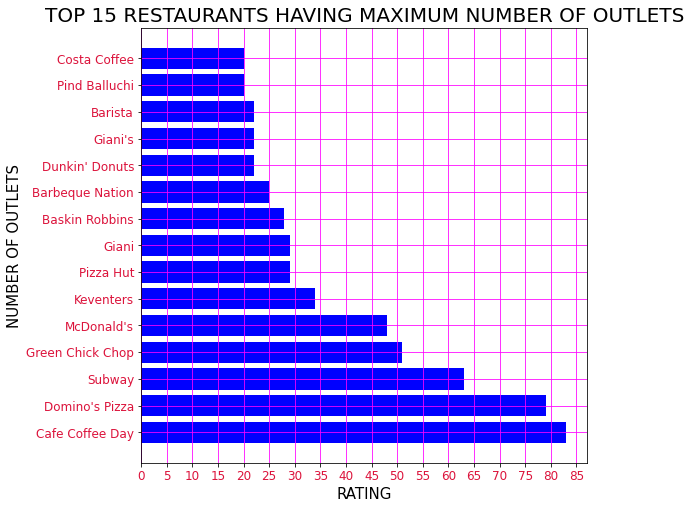

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

a = df['Restaurant Name'].value_counts()[0:15]
restaurant_name = a.index
res = []
for i in restaurant_name:
    res.append(i)
    
restaurant_frequency = a.values
freq = []
for i in restaurant_frequency:
    freq.append(i)
    
plt.figure(figsize = (8,8))
plt.barh(res, freq, color = 'blue')
plt.xlabel('RATING', fontsize = 15, color = 'black')
plt.ylabel('NUMBER OF OUTLETS', fontsize = 15, color = 'black')
plt.title('TOP 15 RESTAURANTS HAVING MAXIMUM NUMBER OF OUTLETS', fontsize = 20, color = 'black')
plt.grid(color = 'magenta')
plt.xticks(np.arange(0,90,5), size = 12, color = 'crimson')
plt.yticks(size = 12, color = 'crimson')
plt.show()

#### 3.2 Plot the histogram of aggregate rating of restaurant (drop the unrated restaurant).

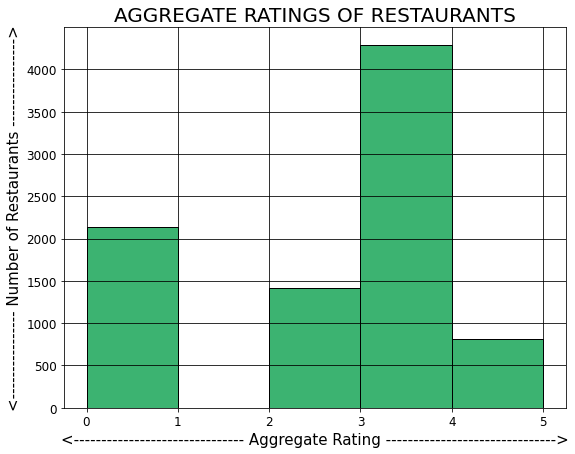

In [44]:
x = df['Aggregate rating'].dropna()
plt.figure(figsize = (9,7))
plt.xticks(range(6), size = 12)
plt.yticks(size = 12)
plt.xlabel('<------------------------------- Aggregate Rating ------------------------------->', fontsize = 15)
plt.ylabel('<---------------- Number of Restaurants ---------------->', fontsize = 15)
plt.title('AGGREGATE RATINGS OF RESTAURANTS', fontsize = 20)
plt.hist(x, color = 'mediumseagreen', edgecolor = 'black', bins = range(6))

plt.grid(color = 'black')
plt.show()

#### 3.3 Plot the bar graph of top 10 restaurants in the data with the highest number of votes.

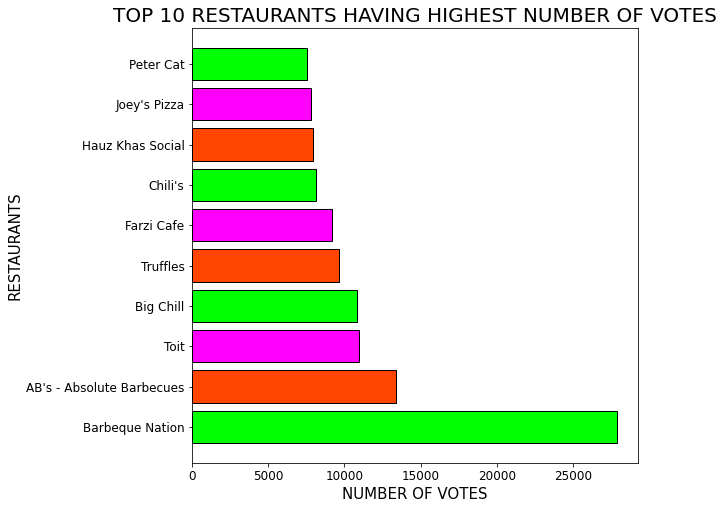

In [45]:
industry_amount = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False)[0:10]
plt.figure(figsize = (8,8))
plt.barh(industry_amount.index,industry_amount.values, color = ['lime','orangered','fuchsia'], edgecolor = 'black')
plt.xlabel('NUMBER OF VOTES', fontsize = 15)
plt.ylabel('RESTAURANTS', fontsize = 15)
plt.title('TOP 10 RESTAURANTS HAVING HIGHEST NUMBER OF VOTES', fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

#### 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

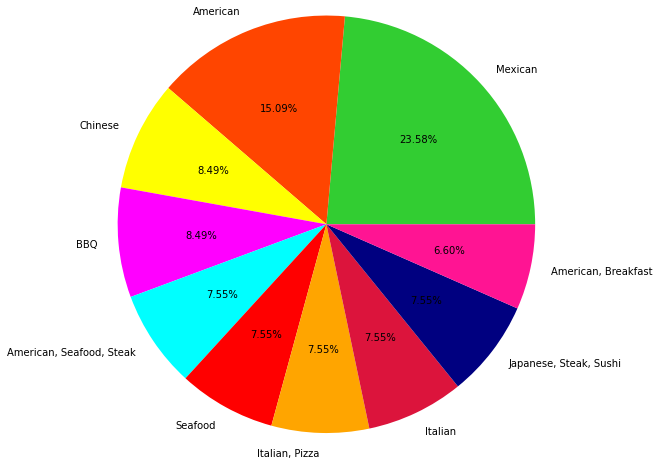

In [8]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
df = df[df['Country Code'] == 216]
val = df['Cuisines'].value_counts()[0:10]
cuisines = val.index
cuisine_freq = val.values

plt.pie(cuisine_freq, labels = cuisines, radius = 2.4, autopct = "%.2f%%", colors = ['limegreen','orangered','yellow','fuchsia','cyan','red','orange','crimson','navy','deeppink'])
plt.show()

#### 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

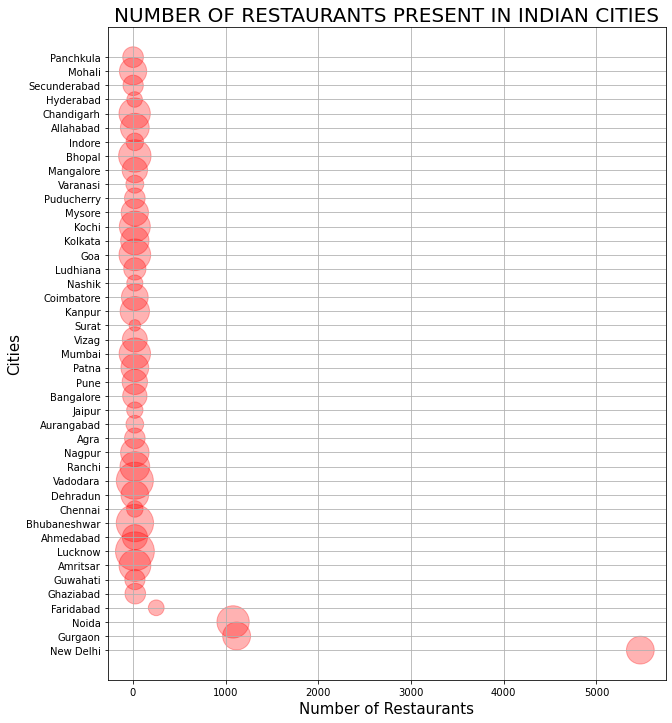

In [104]:
import pandas as pd
import csv
import numpy as np

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
df = df[df['Country Code'] == 1]

np_city = np.array([i for i in df['City']])
np_rating = np.array([i for i in df['Aggregate rating']])
np_votes = np.array([i for i in df['Votes']])

dic = dict()
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city == i)])[0] != 0:
        dic[i] = sum((np_votes * np_rating)[np.argwhere(np_city == i)])[0] / sum(np_votes[np.argwhere(np_city == i)])[0]


size = []
for i in dic:
    size.append(dic[i])
    
val = df['City'].value_counts()
city_name = val.index
rest_freq = val.values

plt.figure(figsize = (10,12))
plt.scatter(rest_freq, city_name, s = 5 ** np.array(size), alpha = 0.3, color = 'red')
plt.grid()
plt.xlabel('Number of Restaurants', fontsize = 15)
plt.ylabel('Cities', fontsize = 15)
plt.title('NUMBER OF RESTAURANTS PRESENT IN INDIAN CITIES', fontsize = 20)
plt.show()